<h1><center> Linear Models

<div class="alert alert-success">
Linear (regression) modelling is a method of predicting the value of an output value as a linear combination of weight input values.
</div>

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Statmodels & patsy
import patsy
import statsmodels.api as sm

# Linear Models with sklearn
from sklearn import linear_model

In [2]:
# Generate some correlated data
corr = 0.75
covs = [[1, corr], [corr, 1]]

means = [0, 0]

dat = np.random.multivariate_normal(means, covs, 1000)

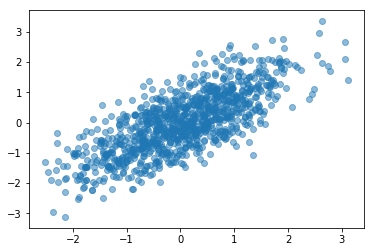

In [3]:
# Check out the data we generated
plt.scatter(dat[:, 0], dat[:, 1], alpha=0.5);

In [4]:
# Put data into a DataFrame
df = pd.DataFrame(dat, columns=['D1', 'D2'])

In [5]:
# Eye ball the data
df.head()

,D1,D2
0,0.502209,0.581489
1,-1.091061,-0.483754
2,1.191680,0.170911
3,-0.284596,0.794369
4,-0.534975,-1.700292


## Linear Models with Statsmodels & Patsy
<br>
<div class="alert alert-success">
Statsmodels is a module for statistical analyses in Python. <br>
Patsy is a useful package to work with and describe statistical models.
</div>

<div class="alert alert-info">
Statsmodels - http://www.statsmodels.org/stable/index.html <br>
Patsy - https://patsy.readthedocs.io/en/latest/
</div>

In [6]:
# Patsy gives us an easy way to construct design matrices
#  For our purpose, 'design matrices' are just organized matrices of our predictor and output variables
outcome, predictors = patsy.dmatrices('D1 ~ D2', df)

# Use statsmodels to intialize the OLS model
mod = sm.OLS(outcome, predictors)

# Fit the model
res = mod.fit()

In [7]:
# Check out the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     D1   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1279.
Date:                Fri, 19 May 2017   Prob (F-statistic):          5.36e-181
Time:                        19:11:22   Log-Likelihood:                -1001.5
No. Observations:                1000   AIC:                             2007.
Df Residuals:                     998   BIC:                             2017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0205      0.021      0.983      0.3

Statsmodels gives us a lot of information! Perhaps most notably, the middle of the above print out gives a the coef's and p-values of our predictors, in this case, 'Intercept', and 'D2'. We see that D2 has a coef a significant coefficient that is approximately the correlation value we generated our data with!

### Using multiple predictors

We can also use more than 1 predictor variable. 

In [8]:
# Add a new column of data to df
df['D3'] = pd.Series(np.random.randn(1000), index=df.index)
df.head()

,D1,D2,D3
0,0.502209,0.581489,-0.276967
1,-1.091061,-0.483754,0.867106
2,1.191680,0.170911,1.191308
3,-0.284596,0.794369,-0.287994
4,-0.534975,-1.700292,1.003555


In [9]:
# Predict D1 from D2 and D3
outcome, predictors = patsy.dmatrices('D1 ~ D2 + D3', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

In [10]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     D1   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     640.0
Date:                Fri, 19 May 2017   Prob (F-statistic):          1.57e-179
Time:                        19:11:22   Log-Likelihood:                -1001.1
No. Observations:                1000   AIC:                             2008.
Df Residuals:                     997   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0197      0.021      0.946      0.3

## Linear Regression with sklearn

Scikit-learn also has implementations of Linear Regression models. 

<br>
<div class="alert alert-info">
Linear Regression in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
</div>

In [11]:
# Convert data into shape for easier use with sklearn
d1 = np.reshape(df.D1.values, [len(df.D1), 1])
d2 = np.reshape(df.D2.values, [len(df.D2), 1])
d3 = np.reshape(df.D3.values, [len(df.D3), 1])

In [12]:
# Initialize linear regression model
reg = linear_model.LinearRegression()

In [13]:
# Fit the linear regression model
reg.fit(d2, d1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Check the results of this
#  If you compare these to what we got with statsmodels above, they are indeed the same
print(reg.intercept_[0])
print(reg.coef_[0][0])

0.0205115074726
0.74025630917


### Using multiple predictors

In [15]:
# Initialize and fit linear model
reg = linear_model.LinearRegression()
reg.fit(np.hstack([d2, d3]), d1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# Check the results of this
#  If you compare these to what we got with statsmodels above, they are indeed the same
print('Intercept: \t', reg.intercept_[0])
print('Theta D2 :\t', reg.coef_[0][0])
print('Theta D3 :\t', reg.coef_[0][1])

Intercept: 	 0.0197398584329
Theta D2 :	 0.73969506124
Theta D3 :	 -0.0194792007873
